In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
data_int = data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
data_int.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


##  StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
sc.fit(data_int)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
data_int_sc = sc.transform(data_int)

In [48]:
df_int_mm = pd.DataFrame(data_int_mm)

In [15]:
data_int_sc

array([[-0.7662174 , -0.97073217,  1.74745381,  0.13954076],
       [-1.49417499, -0.90811123, -1.48902325,  1.33410274],
       [ 0.99983356, -0.95691733,  0.01004021,  0.13954076],
       ...,
       [-0.48623371, -0.59978449, -0.89720755,  0.73682175],
       [-1.21634502,  1.53287976, -0.60797692,  1.33410274],
       [ 0.41832897, -0.41193591, -1.05226104, -0.09937163]])

In [18]:
df_int_sc = pd.DataFrame(data_int_sc)

## MinMax Sclaer
**range** : 0 -1                   
**xi** = (xi- Min)/(Max - Min)                
Q. When to use this ?                       


In [30]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(data_int)
data_int_mm = mm.transform(data_int)

In [39]:
print(data_int['Item_Weight'].min() ,data_int['Item_Weight'].max())

4.555 21.35


## Robust scaler

In [58]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df_int_rs = pd.DataFrame(rs.fit_transform(data_int),columns=data_int.columns)

## Field 1 : Item_Weight

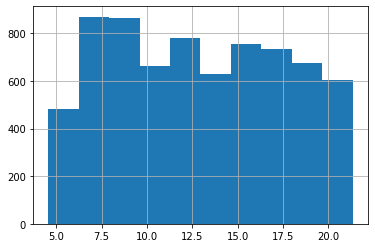

In [28]:
data['Item_Weight'].hist()

(array([132., 351., 403., 467., 401., 464., 358., 306., 373., 406., 342.,
        287., 354., 401., 346., 389., 314., 363., 370., 233.]),
 array([-1.78815786, -1.60729917, -1.42644048, -1.24558178, -1.06472309,
        -0.88386439, -0.7030057 , -0.522147  , -0.34128831, -0.16042962,
         0.02042908,  0.20128777,  0.38214647,  0.56300516,  0.74386385,
         0.92472255,  1.10558124,  1.28643994,  1.46729863,  1.64815733,
         1.82901602]),
 <a list of 20 Patch objects>)

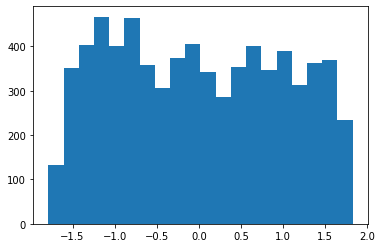

In [24]:
plt.hist(df_int_sc.loc[:,0],bins=20)

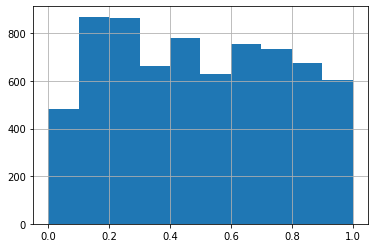

In [50]:
df_int_mm[0].hist()

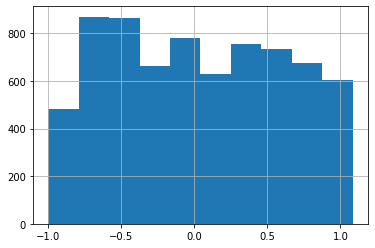

In [60]:
df_int_rs['Item_Weight'].hist()

## FIELD 2 : Item_Visibility

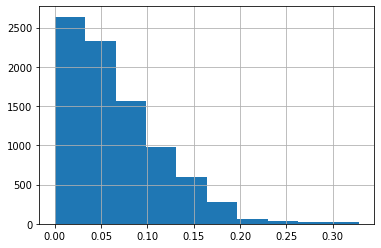

In [29]:
data['Item_Visibility'].hist()

(array([1215., 1424., 1359.,  970.,  928.,  635.,  511.,  468.,  332.,
         261.,  194.,   85.,   34.,   26.,   22.,   13.,   12.,   17.,
          14.,    3.]),
 array([-1.28175775, -0.96351737, -0.64527699, -0.3270366 , -0.00879622,
         0.30944416,  0.62768455,  0.94592493,  1.26416531,  1.58240569,
         1.90064608,  2.21888646,  2.53712684,  2.85536723,  3.17360761,
         3.49184799,  3.81008838,  4.12832876,  4.44656914,  4.76480952,
         5.08304991]),
 <a list of 20 Patch objects>)

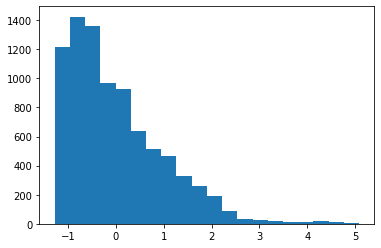

In [23]:
plt.hist(df_int_sc.loc[:,1],bins=20)

## Field 3 : Item_MRP	

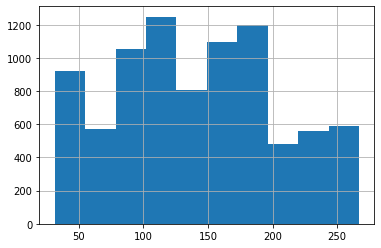

In [51]:
data['Item_MRP'].hist()

(array([451., 472., 415., 158., 477., 576., 620., 628., 295., 509., 580.,
        518., 622., 578., 227., 253., 303., 254., 271., 316.]),
 array([-1.76168769, -1.5725171 , -1.38334651, -1.19417592, -1.00500533,
        -0.81583474, -0.62666415, -0.43749356, -0.24832297, -0.05915238,
         0.13001822,  0.31918881,  0.5083594 ,  0.69752999,  0.88670058,
         1.07587117,  1.26504176,  1.45421235,  1.64338294,  1.83255353,
         2.02172412]),
 <a list of 20 Patch objects>)

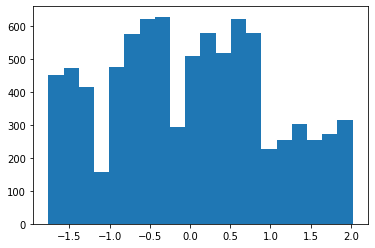

In [25]:
plt.hist(df_int_sc.loc[:,2],bins=20)

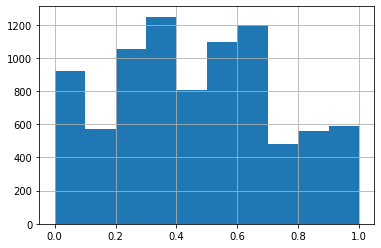

In [52]:
df_int_mm[2].hist()

## Field 4 :Outlet_Establishment_Year	

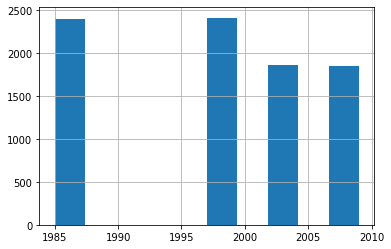

In [54]:
data['Outlet_Establishment_Year'].hist()

(array([1463.,  932.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         930.,  555.,  930.,    0.,    0.,  929.,  930.,    0.,    0.,
         926.,  928.]),
 array([-1.53284601, -1.38949857, -1.24615114, -1.1028037 , -0.95945626,
        -0.81610882, -0.67276139, -0.52941395, -0.38606651, -0.24271907,
        -0.09937163,  0.0439758 ,  0.18732324,  0.33067068,  0.47401812,
         0.61736555,  0.76071299,  0.90406043,  1.04740787,  1.1907553 ,
         1.33410274]),
 <a list of 20 Patch objects>)

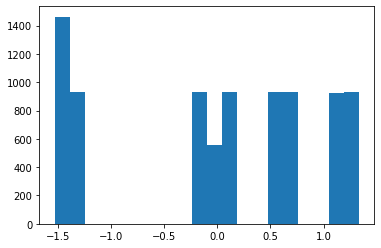

In [27]:
plt.hist(df_int_sc.loc[:,3],bins=20)

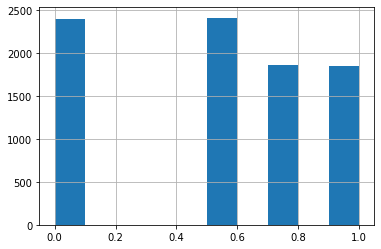

In [53]:
df_int_mm[3].hist()